4 Coordinate Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
import joblib

In [ ]:
# get the main paths
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/small_trajectories.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     774 non-null    int64  
 1   name           774 non-null    object 
 2   latitude_1     774 non-null    float64
 3   longitude_1    774 non-null    float64
 4   latitude_2     774 non-null    float64
 5   longitude_2    774 non-null    float64
 6   latitude_3     774 non-null    float64
 7   longitude_3    774 non-null    float64
 8   latitude_4     774 non-null    float64
 9   longitude_4    774 non-null    float64
 10  enter-parking  774 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 66.6+ KB


In [ ]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,latitude_2,longitude_2,latitude_3,longitude_3,latitude_4,longitude_4,enter-parking
0,0,1_C_Missed,36.111036,-115.140870,36.111097,-115.140867,36.111147,-115.140876,36.111202,-115.140939,0
1,1,2_C_Missed,36.111100,-115.140855,36.111163,-115.140871,36.111207,-115.140928,36.111219,-115.141021,0
2,2,3_C_Missed,36.111139,-115.140852,36.111204,-115.140903,36.111226,-115.140946,36.111226,-115.141043,0
3,3,4_C_Missed,36.111150,-115.140803,36.111172,-115.140846,36.111204,-115.140902,36.111213,-115.141005,0
4,4,5_C_Missed,36.111163,-115.140799,36.111186,-115.140848,36.111205,-115.140909,36.111206,-115.141019,0


In [ ]:
# Get The cordinates for x
x = df[df.columns[2:10]]

# Get the last coordinate
y = df['enter-parking'].values

In [ ]:
# Split the testing and training data. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=73)

In [ ]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(541, 8)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Model creation
model = Sequential()

# 8 neurons for input layer
model.add(Dense(8, activation='relu'))

model.add(Dense(6, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=early_stop,
                    shuffle=True)

Epoch 1/200
17/17 [==============================] - 1s 11ms/step - loss: 0.6948 - accuracy: 0.4769 - val_loss: 0.6935 - val_accuracy: 0.4979
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5342 - val_loss: 0.6946 - val_accuracy: 0.4979
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5342 - val_loss: 0.6955 - val_accuracy: 0.4979
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5342 - val_loss: 0.6961 - val_accuracy: 0.4979
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5342 - val_loss: 0.6956 - val_accuracy: 0.4979
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5342 - val_loss: 0.6942 - val_accuracy: 0.4979
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5342 - val_loss: 0.6950 - val_accuracy: 0.4979
Epoch 8/200


In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

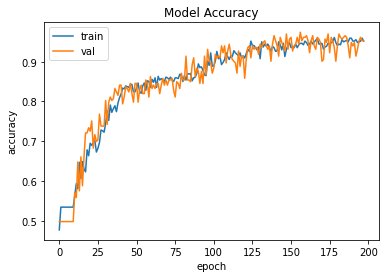

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

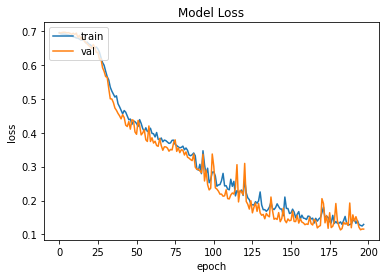

In [ ]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_small_trajectories.csv')

In [ ]:
test_x = test_df[test_df.columns[2:10]]

test_y = test_df['enter-parking'].values

In [ ]:
test_x = scaler.transform(test_x)

In [ ]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.97      0.97      0.97        31

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58



In [ ]:
print(confusion_matrix(test_y, predictions))

[[26  1]
 [ 1 30]]


In [ ]:
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/scaler.gz')

['/content/drive/MyDrive/Colab Notebooks/scaler.gz']

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/saved-model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/saved-model/assets
